Saving mnist_AE.h5 to mnist_AE.h5
313/313 [==============================] - 2s 7ms/step


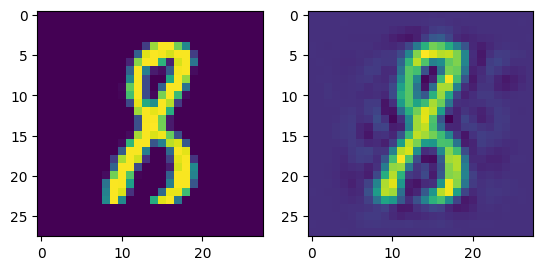

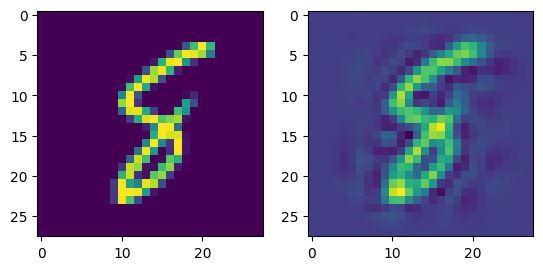

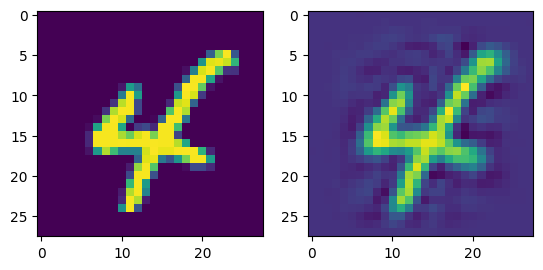

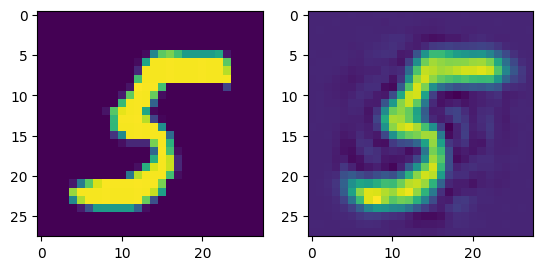

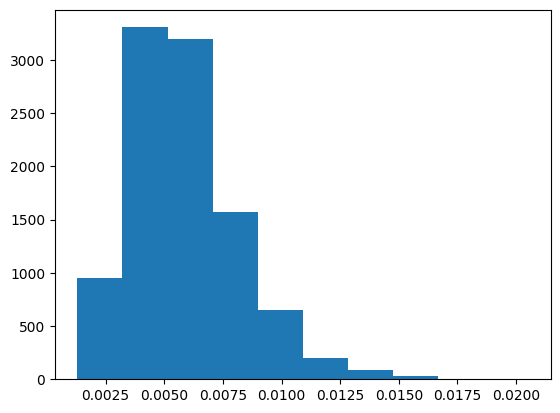

p_value = 4.80290603463721e-38
Not Normal


In [2]:
from keras.datasets import mnist
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as mpl
from scipy import stats
import random

def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
set_seed(810109203)

#          Q3
# alef
(_, _) , (test_images, _) = mnist.load_data()
test_images = test_images.reshape(test_images.shape[0] , -1)
test_images = test_images.astype('float32') / 255.0

# be
autoencoder = tf.keras.models.load_model('mnist_AE.h5')
reconstructed_images = autoencoder.predict(test_images)

# jim
for i in range(4):
    num = random.randint(0, 10000)
    s, surf = mpl.subplot_mosaic([[1, 2]])

    test_image = np.reshape(test_images[num], (28, 28))
    reconstructed_image = np.reshape(reconstructed_images[num], (28,28))
    surf[1].imshow(test_image)
    surf[2].imshow(reconstructed_image)

    mpl.show()

# dal
def Mean_Squared_Error(test, reconstructed):
    result = []
    for i in range(10000):
        err = test[i] - reconstructed[i]
        error_sum = np.sum(err * err)
        result.append(error_sum / (28 * 28))
    return result

MSE = Mean_Squared_Error(test_images, reconstructed_images)

mpl.hist(MSE)
mpl.show()

# he
sample = np.random.choice(np.array(MSE), 10000)

sums = 0
for mse in sample:
    sums += mse
mean = sums / 10000

error = 0
for mse in sample:
    error += ((mse - mean) ** 2)
var = error / 10000
std = var ** 0.5

ks_statistic, p_value = stats.kstest(sample, cdf='norm', args=(mean, std))

print("p_value =", p_value)
if (p_value >= 0.05):
    print("Normal")
else:
    print("Not Normal")